## **구내식당 식수 인원 예측 프로젝트(회귀)**
- 프로젝트 기간: 2023.08.29~2023.08.30
- 프로젝트 목적: 빅데이터를 분석하고 예측하여 구내식당의 잔반 발생량을 줄이는 것을 목표로 한다. 이를 위해 요일별 점심식사와 저녁식사 수요를 예측하는 알고리즘을 만든다.


---

- 2016~2021년까지의 한국토지주택공사의 구내식당 식수 인원 데이터이며, 파일은 다음과 같이 구성되어 있다.  
    ### train.csv(1205 rows × 12 columns)

    - 일자
    - 요일
    - 본사정원수
    - 본사휴가자수
    - 본사출장자수
    - 시간외근무명령서승인건수
    - 현본사소속재택근무자수
    - 조식메뉴
    - 중식메뉴
    - 석식메뉴
    - 중식계
    - 석식계

    ### test.csv

    - 일자
    - 요일
    - 본사정원수
    - 본사휴가자수
    - 본사출장자수
    - 시간외근무명령서승인건수
    - 현본사소속재택근무자수
    - 조식메뉴
    - 중식메뉴
    - 석식메뉴


---


- 최종 결과는 다음과 같이 구성한다.
    ### sample_submission.csv

    - 일자
    - 중식계
    - 석식계




In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 코랩에서 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train_df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [ ]:
train_df.shape, test_df.shape

((1205, 12), (50, 10))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
train_df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


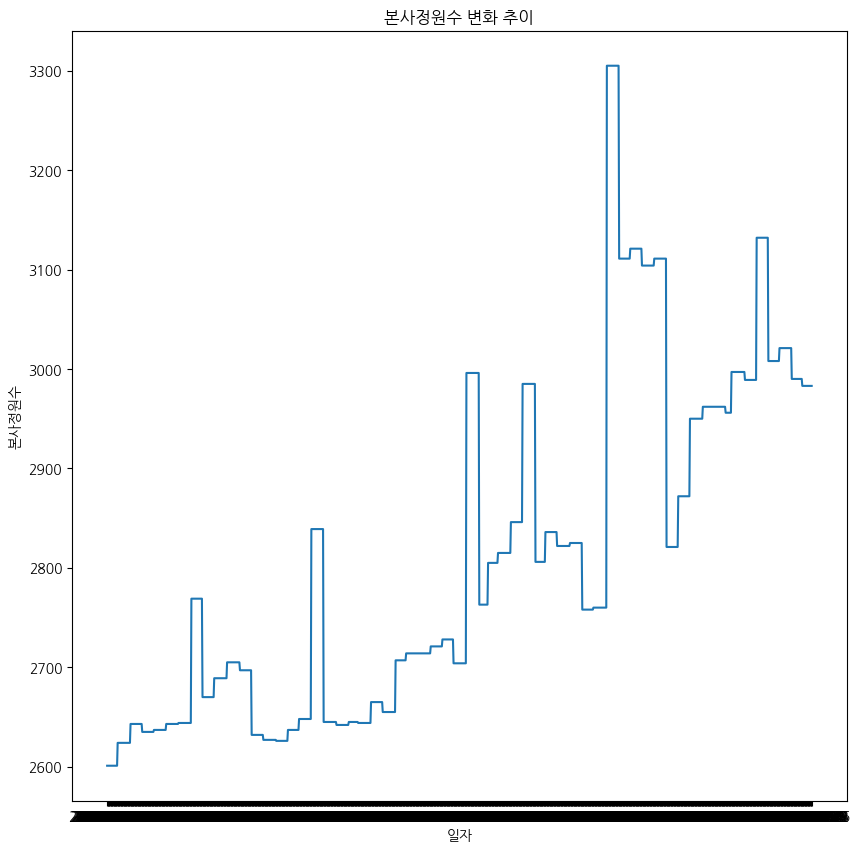

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_df['일자'], train_df['본사정원수'])
plt.xlabel('일자')
plt.ylabel('본사정원수')
plt.title('본사정원수 변화 추이')
plt.show()

### 결측치 확인

In [ ]:
train_df.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

결측치는 없다.

12개 columns에 대한 설명  
- 일자 : 2020-02-05 와 같이 연-월-일로 구성
- 요일 : 월, 화, 수, 목, 금
- 본사정원수 : 현재 본사에서 근무하는 인원의 수
- 본사휴가자수 : 휴가자의 수
- 본사출장자수 : 출장을 간 인원의 수
- 본사시간외근무명령서승인건수 : 야근을 하는 인원의 수
- 현본사소속재택근무자수 : 출근하지 않고 재택 근무 인원의 수
- 조식메뉴, 중식메뉴, 석식메뉴 : 각각 슬래시(/) 로 각 메뉴가 구분됨
- 중식계(TARGET) : 점심을 먹은 사람의 수
- 석식계(TARGET) : 저녁을 먹은 사람의 수

### 본사정원수 대비 요일별 비율 조사
1. 요일별 비율 조사(중식계)  
중식계/(본사정원수)

2. 요일별 비율 조사(석식계)  
석식계/(본사정원수)

In [ ]:
"""
# 각 요일별로 그룹화하여 본사정원수 대비 중식계 비율 및 석식계 비율 계산
grouped = train_df.groupby('요일').apply(lambda group: group.assign(
    중식계비율=group['중식계'] / group['본사정원수'],
    석식계비율=group['석식계'] / group['본사정원수']
))
"""

"\n# 각 요일별로 그룹화하여 본사정원수 대비 중식계 비율 및 석식계 비율 계산\ngrouped = train_df.groupby('요일').apply(lambda group: group.assign(\n    중식계비율=group['중식계'] / group['본사정원수'],\n    석식계비율=group['석식계'] / group['본사정원수']\n))\n"

In [ ]:
# grouped

In [ ]:
lunch_dic = {}
for day in ['월', '화', '수', '목', '금']:
    day_data = train_df[train_df['요일'] == day]
    mean = day_data['중식계'] / day_data['본사정원수']
    lunch_dic[day] = mean

In [ ]:
lunch_dic

{'월': 0       0.399462
 7       0.487505
 12      0.499039
 17      0.334102
 21      0.505335
           ...   
 1184    0.420067
 1188    0.471002
 1193    0.421388
 1198    0.428093
 1203    0.383842
 Length: 241, dtype: float64,
 '화': 1       0.333333
 8       0.389850
 13      0.345636
 22      0.391006
 27      0.365091
           ...   
 1185    0.329097
 1189    0.378143
 1194    0.322829
 1199    0.347972
 1204    0.340261
 Length: 240, dtype: float64,
 '수': 2       0.391003
 9       0.352172
 14      0.392926
 18      0.429497
 23      0.343369
           ...   
 1181    0.379599
 1186    0.256856
 1190    0.339926
 1195    0.306068
 1200    0.366410
 Length: 239, dtype: float64,
 '목': 3       0.376009
 5       0.401769
 10      0.349865
 15      0.352557
 19      0.381098
           ...   
 1182    0.366555
 1187    0.197659
 1191    0.348642
 1196    0.347972
 1201    0.278914
 Length: 244, dtype: float64,
 '금': 4       0.355632
 6       0.349481
 11      0.293349
 16      

In [ ]:
dinner_dic = {}
for day in ['월', '화', '수', '목', '금']:
    day_data = train_df[train_df['요일'] == day]
    mean = day_data['석식계'] / day_data['본사정원수']
    dinner_dic[day] = mean

In [ ]:
import pandas as pd

# 각 요일별 점심 식사 비율 평균을 데이터프레임에 추가
lunch_means = []
for day in ['월', '화', '수', '목', '금']:
    lunch_mean = lunch_dic[day].mean()
    lunch_means.append({'요일': day, '점심식사 비율': round(lunch_mean, 2)}) # 소수점 둘째자리까지

# 각 요일별 저녁 식사 비율 평균을 데이터프레임에 추가
dinner_means = []
for day in ['월', '화', '수', '목', '금']:
    dinner_mean = dinner_dic[day].mean()
    dinner_means.append({'요일': day, '저녁식사 비율': round(dinner_mean, 2)})

# 데이터프레임 생성
lunch_df = pd.DataFrame(lunch_means)
dinner_df = pd.DataFrame(dinner_means)

In [ ]:
# 결과 표 출력
print("<본사 정원수 대비 요일별 점심식사 비율>")
lunch_df

<본사 정원수 대비 요일별 점심식사 비율>


,요일,점심식사 비율
0,월,0.41
1,화,0.33
2,수,0.32
3,목,0.30
4,금,0.23


In [ ]:
print("<본사 정원수 대비 요일별 저녁식사 비율>")
dinner_df

<본사 정원수 대비 요일별 저녁식사 비율>


,요일,저녁식사 비율
0,월,0.19
1,화,0.19
2,수,0.13
3,목,0.17
4,금,0.15


In [ ]:
"""
for day in ['월', '화', '수', '목', '금']:
    lunch_mean = lunch_dic[day].mean()
    print(f"{day}요일의 본사정원수 대비 점심 식사 비율은 {lunch_mean}이다.\n")

for day in ['월', '화', '수', '목', '금']:
    dinner_mean = dinner_dic[day].mean()
    print(f"{day}요일의 본사정원수 대비 저녁 식사 비율은 {dinner_mean}이다.\n")
"""

'\nfor day in [\'월\', \'화\', \'수\', \'목\', \'금\']:\n    lunch_mean = lunch_dic[day].mean()\n    print(f"{day}요일의 본사정원수 대비 점심 식사 비율은 {lunch_mean}이다.\n")\n\nfor day in [\'월\', \'화\', \'수\', \'목\', \'금\']:\n    dinner_mean = dinner_dic[day].mean()\n    print(f"{day}요일의 본사정원수 대비 저녁 식사 비율은 {dinner_mean}이다.\n")\n'

### 본사출장자수가 점심식사와 저녁식사 비율에 영향을 주는지 확인

In [ ]:
# 상관계수 계산
correlation_matrix = train_df[['본사출장자수', '중식계', '석식계']].corr()

# 상관계수 출력
correlation_matrix

,본사출장자수,중식계,석식계
본사출장자수,1.000000,-0.512680,-0.188164
중식계,-0.512680,1.000000,0.508287
석식계,-0.188164,0.508287,1.000000


상관계수의 절댓값이 0.5보다 크므로, 중식계와 본사 출장자수 간의 관계는 중간 정도로 강한 음의 상관관계를 가질 수 있다.  
상관계수의 절댓값이 0.1보다 작으므로, 석식계와 본사 출장자수 간의 관계는 상대적으로 약한 음의 상관관계를 가질 수 있다.  
즉, 본사출장자수 비율이 늘어날수록 중식계의 감소에 영향을 준다고 할 수 있다.

In [ ]:
# 요일별 본사출장자수의 평균 계산
outside = train_df.groupby('요일')['본사출장자수'].mean()

# 요일별 본사출장자수의 크기 순서 파악
sorted_days_outside = outside.sort_values(ascending=False)

print("요일별 본사출장자수 평균 크기 순서:")
print(sorted_days_outside)

요일별 본사출장자수 평균 크기 순서:
요일
금    273.680498
목    255.577869
수    241.405858
화    230.637500
월    204.190871
Name: 본사출장자수, dtype: float64


In [ ]:
# train data 일자를 연월일로 구분
train_df['일자'] = train_df['일자'].astype('str')
dates = train_df['일자'].str.split('-')

train_df['연'] = dates.str.get(0)
train_df['월'] = dates.str.get(1)
train_df['일'] = dates.str.get(2)

In [ ]:
# test data일자를 연월일로 구분
test_df['일자'] = test_df['일자'].astype('str')
dates = test_df['일자'].str.split('-')

test_df['연'] = dates.str.get(0)
test_df['월'] = dates.str.get(1)
test_df['일'] = dates.str.get(2)

In [ ]:
train_df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,01
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,02
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,03
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,02,04
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021,01,20
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021,01,21
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021,01,22
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021,01,25


In [ ]:
# 요일을 숫자로 매핑
train_df['요일'] = train_df['요일'].map({'월': 0, '화': 1, '수': 2, '목': 3, '금': 4})
test_df['요일'] = test_df['요일'].map({'월': 0, '화': 1, '수': 2, '목': 3, '금': 4})

In [ ]:
# 월을 계절 별로 3개씩 묶어서 매핑
def map_month_to_season(month):
    if month in [1, 2, 3]:
        return 1  # 1월, 2월, 3월을 1로 매핑
    elif month in [4, 5, 6]:
        return 2  # 4월, 5월, 6월을 2로 매핑
    elif month in [7, 8, 9]:
        return 3  # 7월, 8월, 9월을 3로 매핑
    else:
        return 4  # 나머지 월을 4로 매핑 (10, 11, 12)

train_df['계절'] = train_df['월'].apply(map_month_to_season)
test_df['계절'] = test_df['월'].apply(map_month_to_season)

In [ ]:
train_df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연,월,일,계절
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,01,4
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,02,4
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,03,4
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,02,04,4
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,02,05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021,01,20,4
1201,2021-01-21,3,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021,01,21,4
1202,2021-01-22,4,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021,01,22,4
1203,2021-01-25,0,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021,01,25,4


In [ ]:
test_df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,연,월,일,계절
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,01,27,4
1,2021-01-28,3,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2021,01,28,4
2,2021-01-29,4,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2021,01,29,4
3,2021-02-01,0,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2021,02,01,4
4,2021-02-02,1,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2021,02,02,4
5,2021-02-03,2,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치,2021,02,03,4
6,2021-02-04,3,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치,2021,02,04,4
7,2021-02-05,4,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치,2021,02,05,4
8,2021-02-08,0,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치,2021,02,08,4
9,2021-02-09,1,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지,2021,02,09,4


In [ ]:
# features 설정
X_train = train_df[[]]
y1_train = train_df['중식계']
y2_train = train_df['석식계']

X_test = test_df[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '연', '계절']]

In [ ]:
# 중식계 예측 모델
model1 = LinearRegression()

# 석식계 예측 모델
model2 = LinearRegression()

In [ ]:
model1.fit(X_train, y1_train)

LinearRegression()

In [ ]:
model2.fit(X_train, y2_train)

LinearRegression()

In [ ]:
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)

In [ ]:
submission['중식계'] = y1_pred
submission['석식계'] = y2_pred

In [ ]:
submission.to_csv('Prediction.csv', index=False)

In [ ]:
# PKL 파일 저장

import joblib

joblib.dump(model1, 'lunch.pkl')
joblib.dump(model2, 'dinner.pkl')

['dinner.pkl']

In [ ]:
# 모델 로드
loaded_model = joblib.load('lunch.pkl')

# 예측하려는 날짜와 관련된 데이터 준비
input_data = {
    '요일': 4,  #  월: 0, 화: 1, 수: 2, 목: 3, 금: 4
    '본사정원수': 2980,
    '본사출장자수': 175,
    '본사시간외근무명령서승인건수': 200,
    '현본사소속재택근무자수': 450,
    '연': 2021,
    '계절': '3',  # 1: 봄, 2: 여름 3: 가을 4: 겨울
}

# 데이터프레임 형태로 변환
input_df = pd.DataFrame([input_data])

# 예측
predicted_lunch = loaded_model.predict(input_df)

print(f"예측된 중식계: {predicted_lunch[0]}")

예측된 중식계: 768.0079665051671
